In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

%matplotlib inline

In [3]:
data = pd.read_csv("shopping-data.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<function matplotlib.pyplot.show(close=None, block=None)>

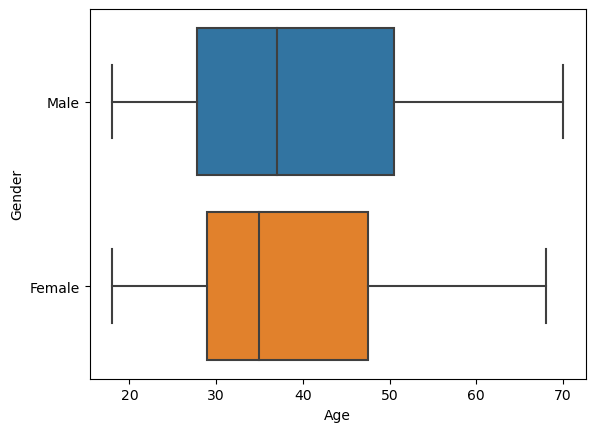

In [5]:
# Boxplot 1: Age to Gender.
sns.boxplot(data=data, x="Age", y="Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

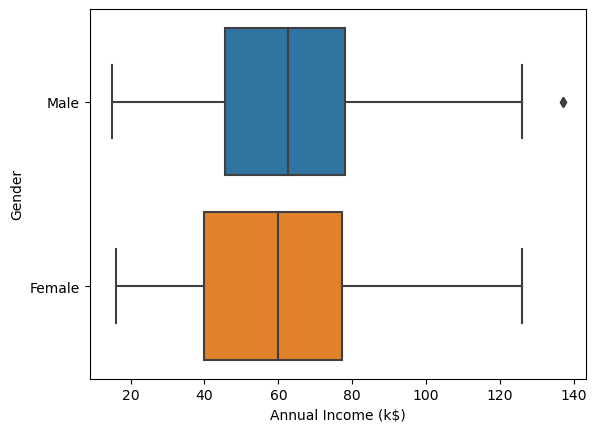

In [7]:
# Boxplot 2: Annual Income to Gender.
sns.boxplot(data=data, x="Annual Income (k$)", y="Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

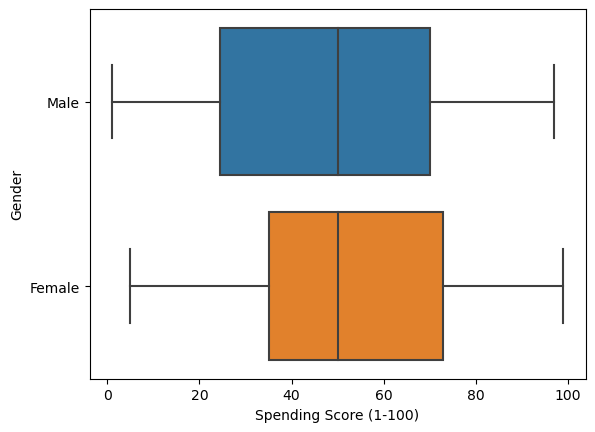

In [8]:
# Boxplot 3: Spending Score (1-100) to Gender.
sns.boxplot(data=data, x="Spending Score (1-100)", y="Gender")
plt.show

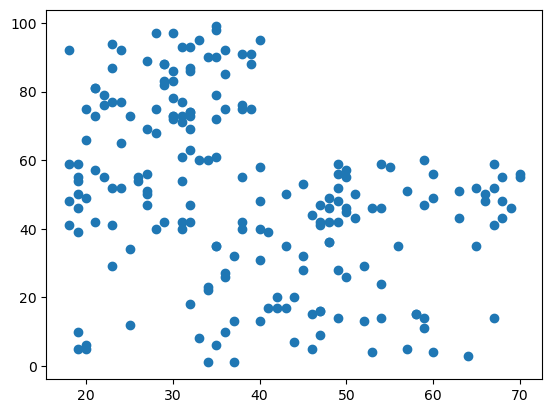

In [9]:
# Det går inte speciellt bra att bilda en uppfattning genom att göra en scatter-plot för att få fram k-värdet.
plt.scatter(data["Age"], data["Spending Score (1-100)"])

In [11]:
data = data.iloc[:,[2,4]]
distortions = []
K = range(1,10)
for k in K:
    kModel = KMeans(n_clusters=k).fit(data)
    kModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

IndexError: positional indexers are out-of-bounds

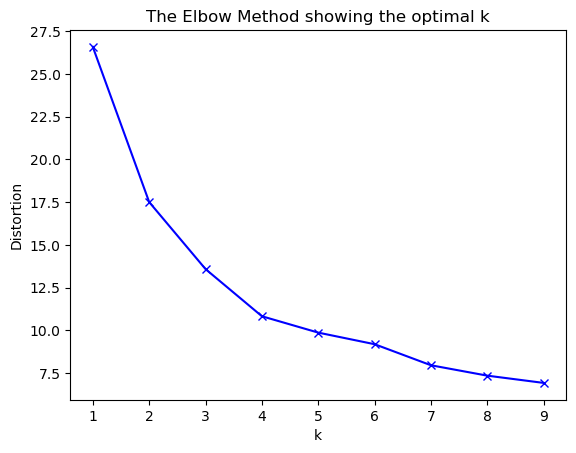

In [14]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [16]:
y_predicted = km.fit_predict(data[["Age", "Spending Score (1-100)"]])
y_predicted

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [20]:
data["cluster"] = y_predicted
data.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_13212\3753846728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cluster"] = y_predicted


,Age,Spending Score (1-100),cluster
0,19,39,2
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,2


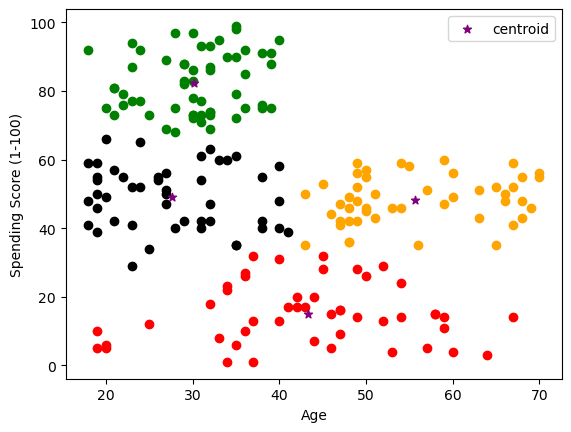

In [18]:
# Nu har vi istället gjort allt i en plot, ser ganska ok ut men kan göra bättre.
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
df4 = data[data.cluster==3]

plt.scatter(df1.Age,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.Age,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.Age,df3['Spending Score (1-100)'],color='black')
plt.scatter(df4.Age,df4['Spending Score (1-100)'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [25]:
 print(data.columns.tolist())

['Age', 'Spending Score (1-100)', 'cluster']


In [26]:
data2 = pd.read_csv("customerdata4.csv", sep=',')

In [27]:
 print(data2.columns.tolist())

['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'Spending Score (1-100)']


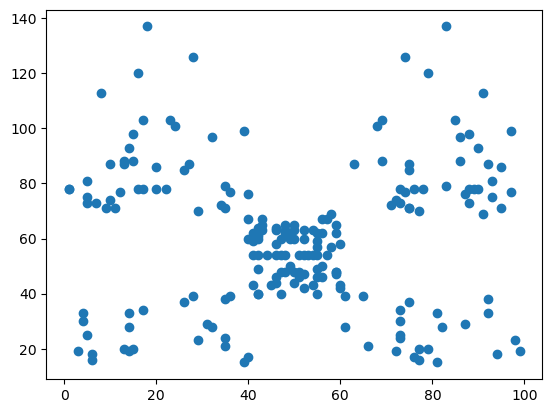

In [28]:
plt.scatter(data2["Spending Score (1-100)"], data2["AnnualIncome"])

In [29]:
data2 = data2.iloc[:,[3,4]]
distortions = []
K = range(1,10)
for k in K:
    kModel = KMeans(n_clusters=k).fit(data2)
    kModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


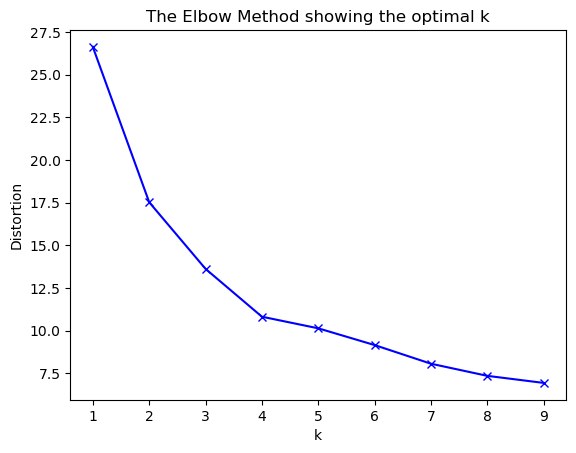

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
km2 = KMeans(n_clusters=5)
km2

KMeans(n_clusters=5)

In [32]:
print(data2.columns.tolist())

['AnnualIncome', 'Spending Score (1-100)']


In [33]:
x_predicted = km.fit_predict(data2[["Spending Score (1-100)", "AnnualIncome"]])
x_predicted

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [34]:
data2["cluster2"] = x_predicted
data2.head()

,AnnualIncome,Spending Score (1-100),cluster2
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


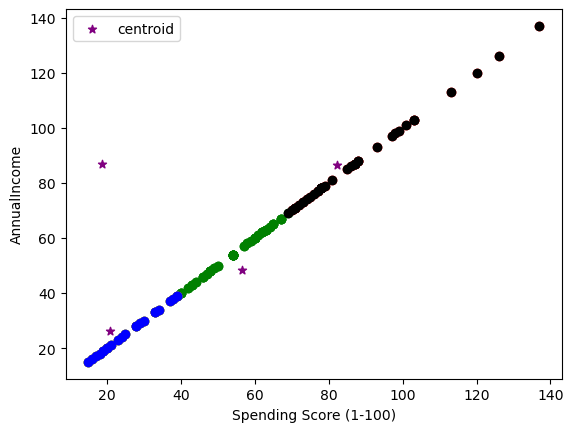

In [36]:
df1 = data2[data2.cluster2==0]
df2 = data2[data2.cluster2==1]
df3 = data2[data2.cluster2==2]
df4 = data2[data2.cluster2==3]
df5 = data2[data2.cluster2==4]

plt.scatter(df1.AnnualIncome,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.AnnualIncome,df2['AnnualIncome'],color='red')
plt.scatter(df3.AnnualIncome,df3['AnnualIncome'],color='black')
plt.scatter(df4.AnnualIncome,df4['AnnualIncome'],color='orange')
plt.scatter(df4.AnnualIncome,df4['AnnualIncome'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Spending Score (1-100)')
plt.ylabel('AnnualIncome')
plt.legend()